In [1]:
import cv2
import numpy as np
import shapely
from shapely.geometry import Polygon
import sys
import os
sys.path.append(os.getcwd())
sys.path.append('../')

from FOTS.model import *
from FOTS.dataset import *
from FOTS.utils import *
import matplotlib.pyplot as plt

In [2]:
dataset = ICDAR2015_Dataset()
img, boxes, labels  = dataset.readData(309)
img_aug, boxes_aug, labels_aug = dataset.augmenter(img, boxes, labels)

data_util = DataUtil_FOTS()
score_map, train_mask, index_map = data_util.generate_score_map(img_aug, boxes_aug, labels_aug)
geo_map = data_util.generate_geo_map(img_aug, boxes_aug, index_map, train_mask)

In [3]:
score_map = score_map * train_mask
score_map = score_map[np.newaxis,:,:]
geo_map = geo_map.transpose(2,0,1)

print(score_map.shape,geo_map.shape)

(1, 512, 512) (5, 512, 512)


In [4]:
score_map = score_map[0]
xy_text = np.argwhere(score_map > 0.5)  # N*2

In [9]:
xy_text = xy_text[np.argsort(xy_text[:, 0])]
valid_pos = xy_text[:,::-1].copy()  # n x 2, [x, y]
valid_geo = geo_map[:, xy_text[:, 0], xy_text[:, 1]]

<Figure size 2160x2160 with 0 Axes>

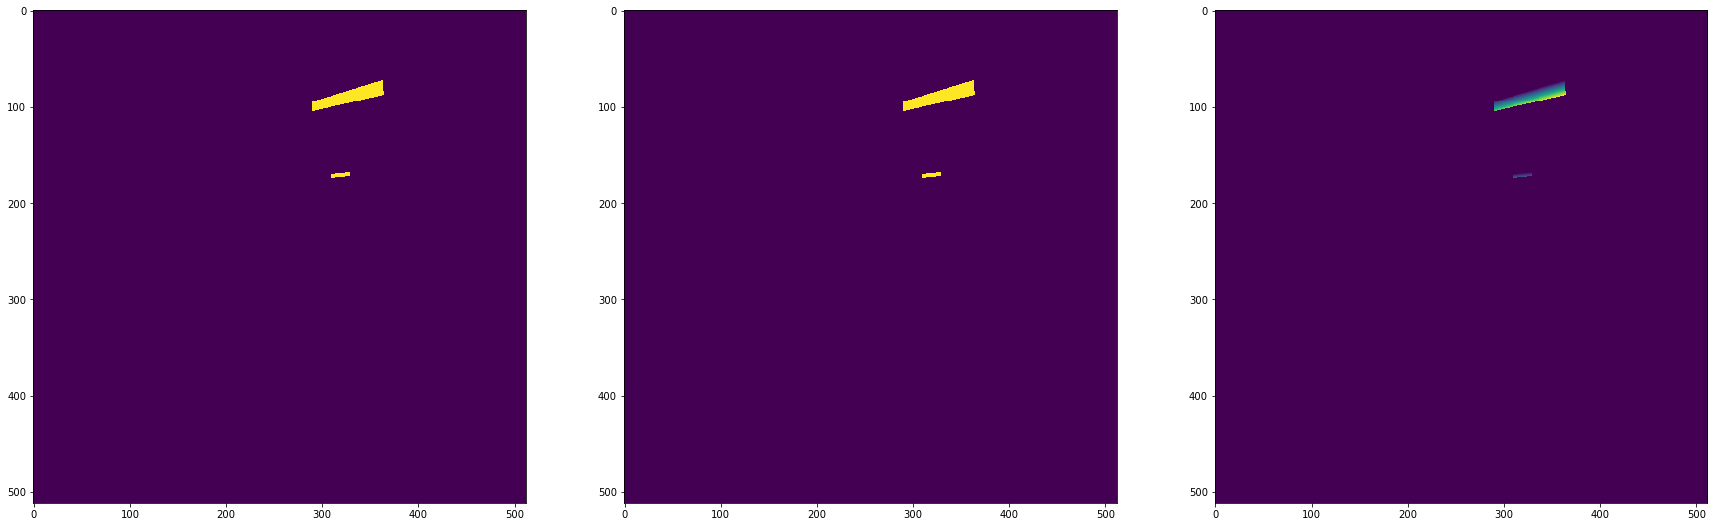

In [16]:
im = np.zeros((512,512))
im[valid_pos [:,1],valid_pos[:,0]] = 1

plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.imshow(score_map)
plt.subplot(1,3,2)
plt.imshow(im)
plt.subplot(1,3,3)
plt.imshow(geo_map[0])

<Figure size 2160x2160 with 0 Axes>

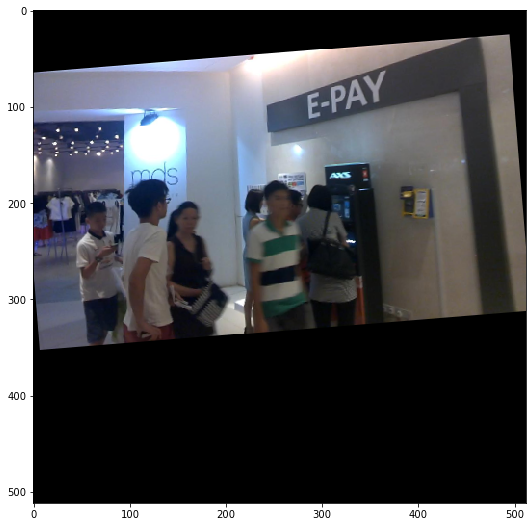

In [21]:
plt.figure(figsize=(30,30))
plt.subplot(1,3,1)
plt.imshow(img_aug)